# Loading DB

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [ ]:
X, y = digits.data, digits.target

In [34]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [52]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
X.shape

(1797, 64)

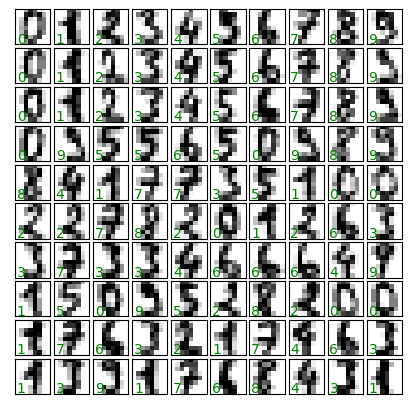

In [37]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

In [3]:
# Load the data from the json file

import json

# Assuming your JSON file is named 'data.json'
file_path = 'data.json'

# Load the JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

# Access the data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Convert lists to NumPy arrays
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

# Now you can use X_train, y_train, X_test, y_test as needed
# Example:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [4]:
from sklearn.feature_selection import VarianceThreshold

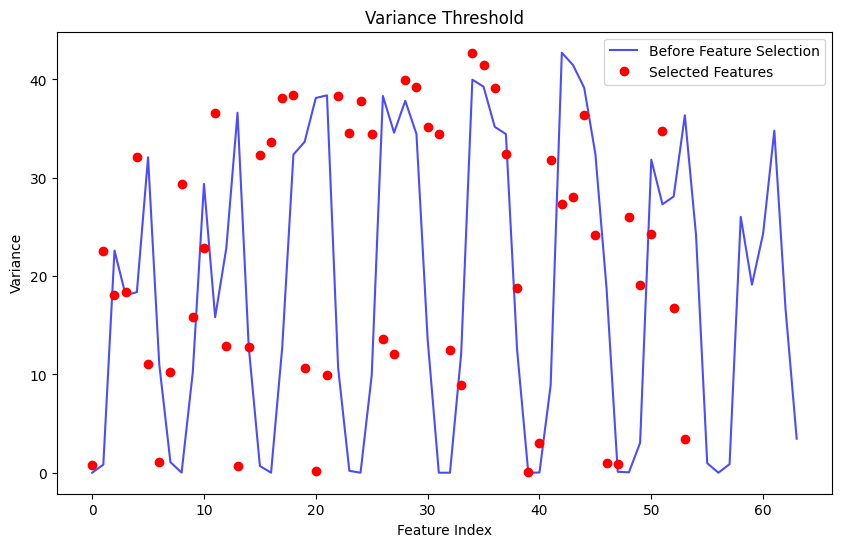

Number of selected features (VarianceThreshold): 54


In [23]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
X_fs_p90 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p90, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p90.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

## P = 0.8

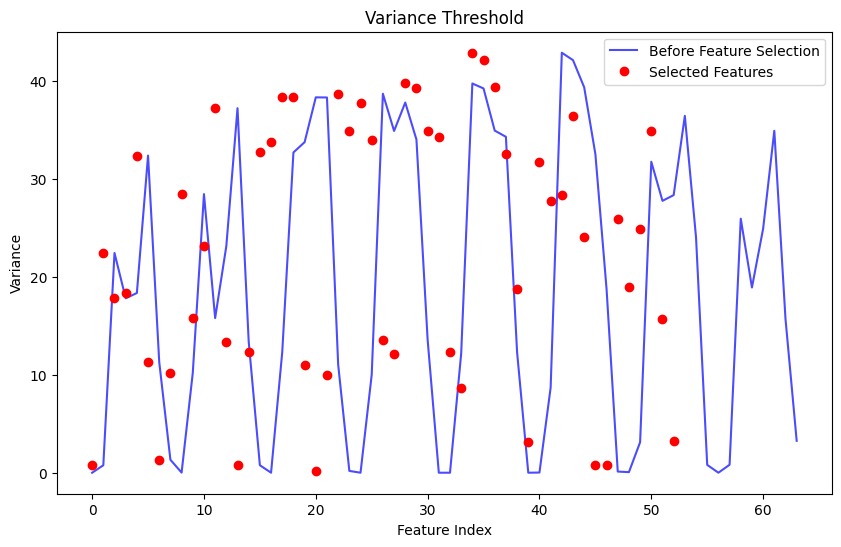

Number of selected features (VarianceThreshold): 53


In [17]:
# Calculate variances of features before feature selection
variances_before = np.var(X_train, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_fs = sel.fit_transform(X_train)
X_test_fs = sel.transform(X_test)
# Calculate variances of features after feature selection
variances_after = np.var(X_train_fs, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_train_fs.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

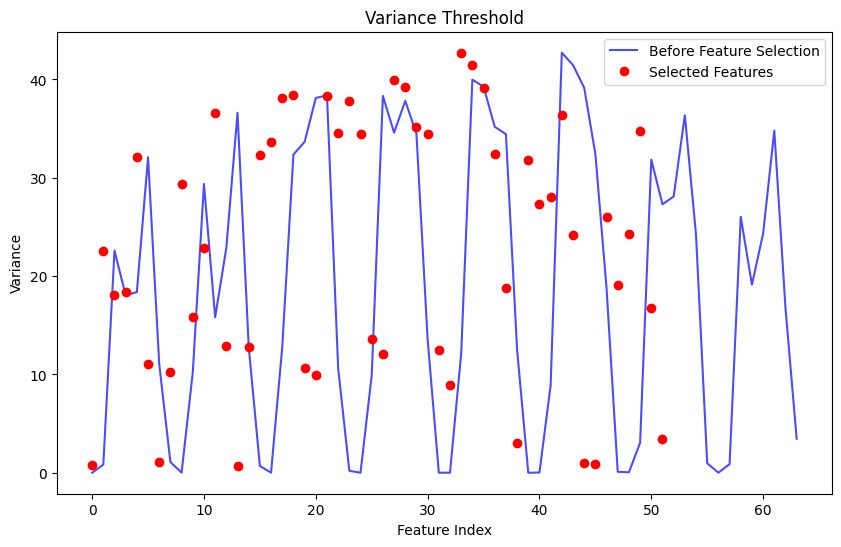

Number of selected features (VarianceThreshold): 52


In [22]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
X_fs_p60 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p60, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p60.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

# Feature Extraction

In [6]:
from sklearn.decomposition import PCA

## P = 0.8

[2,5,7,9,10,12,15,20,30]

# Classifiaction

In [9]:
from sklearn.neural_network import MLPClassifier

In [7]:
X_train

array([[ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 16.,  7.,  0.],
       [ 0.,  1., 11., ..., 13., 16.,  5.],
       [ 0.,  0.,  3., ...,  8.,  0.,  0.]])

In [11]:
from sklearn.metrics import accuracy_score
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp_clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9740740740740741


In [13]:
num_components_list = [2, 5, 7, 9, 10, 12, 15, 20, 30]

## Playing with hidden layer parameter

In [14]:
hidden_layer_sizes = [
    (50,),           # Single layer with 50 neurons
    (100,),          # Single layer with 100 neurons
    (50, 50),        # Two layers with 50 neurons each
    (100, 100),      # Two layers with 100 neurons each
    (50, 50, 50),    # Three layers with 50 neurons each
    (100, 100, 100), # Three layers with 100 neurons each
    (50, 100, 50),   # Three layers with varying neuron sizes
    (100, 50, 100)   # Three layers with varying neuron sizes
]

In [19]:
for n_components in num_components_list:
    pca = PCA(n_components = n_components)
    # Feature Extraction on the data after feature selection with p=0.8
    X_train_fe = pca.fit_transform(X_train_fs)
    X_test_fe = pca.transform(X_test_fs)
    for hidden_layer_size in hidden_layer_sizes:
        mlp_clf = MLPClassifier(hidden_layer_sizes= hidden_layer_size, max_iter=1000, random_state=42)

        # Train the classifier
        mlp_clf.fit(X_train_fe, y_train)
        
        # Predict the labels for the test set
        y_pred = mlp_clf.predict(X_test_fe)
        
        # Evaluate the classifier's performance
        accuracy = accuracy_score(y_test, y_pred)
        print("/////////////////////////////////////////////////////////////////")
        print("n_components:", n_components)
        print("hidden_layer_size:", hidden_layer_size)
        print("Accuracy:", accuracy)
        print("/////////////////////////////////////////////////////////////////")

/////////////////////////////////////////////////////////////////
n_components: 2
hidden_layer_size: (50,)
Accuracy: 0.6481481481481481
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 2
hidden_layer_size: (100,)
Accuracy: 0.6351851851851852
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 2
hidden_layer_size: (50, 50)
Accuracy: 0.6574074074074074
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 2
hidden_layer_size: (100, 100)
Accuracy: 0.6518518518518519
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 2
hidden_layer_size: (50, 50, 50)
Accuracy: 0.6555555555555556
////////////////////////////////////////

D:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


/////////////////////////////////////////////////////////////////
n_components: 5
hidden_layer_size: (50,)
Accuracy: 0.8981481481481481
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 5
hidden_layer_size: (100,)
Accuracy: 0.912962962962963
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 5
hidden_layer_size: (50, 50)
Accuracy: 0.8944444444444445
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 5
hidden_layer_size: (100, 100)
Accuracy: 0.8925925925925926
/////////////////////////////////////////////////////////////////
/////////////////////////////////////////////////////////////////
n_components: 5
hidden_layer_size: (50, 50, 50)
Accuracy: 0.8981481481481481
/////////////////////////////////////////

D:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\shilo\AppData\Local\Temp\ipykernel_25264\2087133812.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df.pivot('n_components', 'hidden_layer_size', 'accuracy')


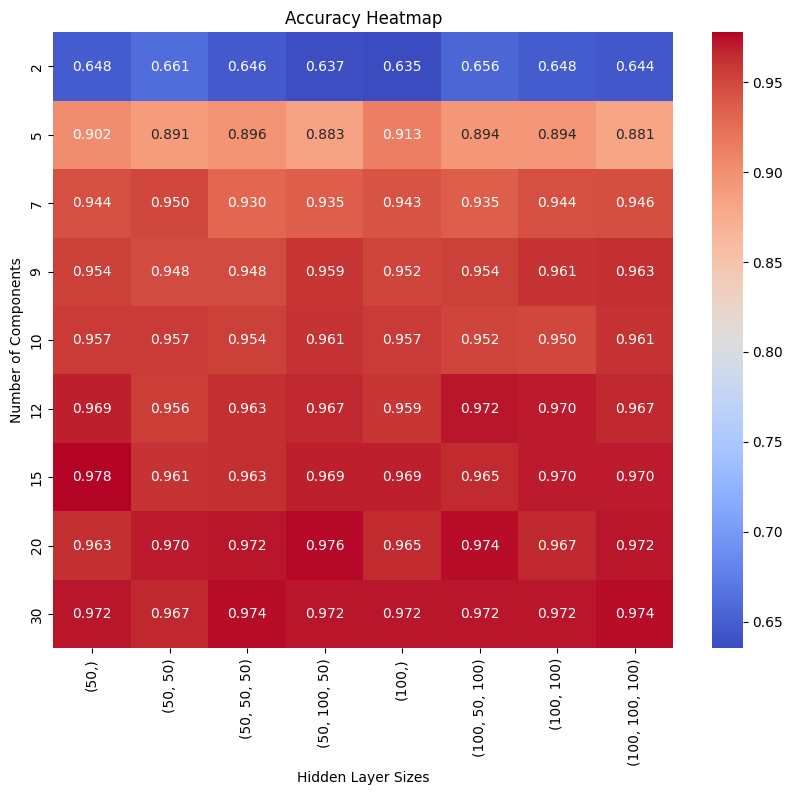

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare a grid of n_components and hidden_layer_sizes combinations
grid = []
for n_components in num_components_list:
    for hidden_layer_size in hidden_layer_sizes:
        grid.append((n_components, hidden_layer_size))

# Compute accuracy for each combination
accuracies = []
for n_components, hidden_layer_size in grid:
    pca = PCA(n_components=n_components)
    X_train_fe = pca.fit_transform(X_train_fs)
    X_test_fe = pca.transform(X_test_fs)
    
    mlp_clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, max_iter=1000, random_state=42)
    mlp_clf.fit(X_train_fe, y_train)
    y_pred = mlp_clf.predict(X_test_fe)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n_components, hidden_layer_size, accuracy))

# Convert accuracies to DataFrame
df = pd.DataFrame(accuracies, columns=['n_components', 'hidden_layer_size', 'accuracy'])

# Create a pivot table
pivot_table = df.pivot('n_components', 'hidden_layer_size', 'accuracy')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Accuracy Heatmap')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Number of Components')
plt.show()


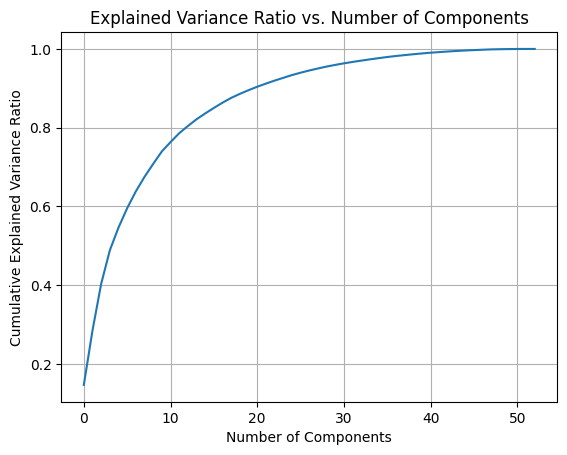

Number of components capturing 95% of variance: 28


In [22]:
# Assume X_train is your training data

# Fit PCA to your data
pca1 = PCA()
pca1.fit(X_train_fs)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca1.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Determine the number of components capturing 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components capturing 95% of variance:", n_components)